In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [16]:
airplane_crashes = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv', sep=",")

In [17]:
airplane_crashes.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,03/03/1928,NaN,"Rio de Janeiro, Brazil",NaN,NaN,NaN,NaN,NaN,NaN,10,10,0,NaN
1,12/03/1928,08:00,Brazil,Syndicato Condor,NaN,NaN,Dornier Wal,P-BACA,063,14,14,0,The seaplane took off form the bay and narrowl...
2,12/04/1928,NaN,"Rio de Janeiro, Brazil",NaN,NaN,NaN,Junkers G24,NaN,NaN,6,6,0,The aircraft's wingtip struck the water and cr...
3,11/07/1930,NaN,"Off of Santos, Brazil",Syndicato Condor,NaN,NaN,Junkers G-24,P-BAHA,921,9,1,0,Crashed into the sea.
4,10/14/1931,NaN,Brazil,Syndicato Condor,NaN,NaN,Dornier Wal,P-BALSA,107,3,3,0,NaN


In [9]:
print(airplane_crashes.shape)

(193, 13)


In [11]:
airplane_crashes.Fatalities.describe()

count    193.000000
mean      17.025907
std       27.434474
min        1.000000
25%        4.000000
50%        9.000000
75%       20.000000
max      228.000000
Name: Fatalities, dtype: float64

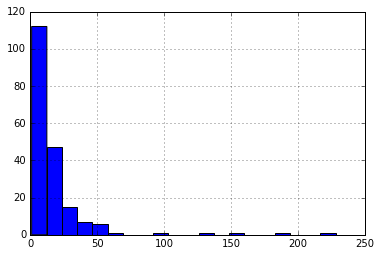

In [14]:
airplane_crashes.Fatalities.hist(bins=20)